# Herz Erkrankungen - Was sind Indikatoren?

![heart_desease.png](heart_desease.png)

### 1. Bibliotheken importieren

In [12]:
%pip install pandas seaborn matplotlib numpy torch sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

### 2. Daten laden

Datenquelle: https://archive.ics.uci.edu/dataset/45/heart+disease

In [2]:
data = pd.read_csv("heart.csv")

### 3. Erster Einblick in Daten

- gewinne eine erste Übersicht über die Date
- schaue, ob eventuell Daten fehlen
- wie sind die Daten verteilt

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<details>
  <summary><b>Hinweis</b></summary>
  <p><code>.head(n)</code> (n=Anzahl der Spalten): zeigt die ersten n Spalten des DataFrames</p>
  <p><code>.info()</code>: Übersicht des DataFrames (Anzahl der Einträge, Spaltennamen, Datentypen, Speicherverbrauch)</p>
  <p><code>.describe()</code>: statistische Übersicht für numerische Spalten (Mittelwert, Standardabweichung, Minimum, Maximum)</p>
</details>

### Datenbeschreibung

| Feature   | Description | Values |
|-----------|-------------|--------|
| age       | Age in years | - |
| sex       | Sex | 1 = male, 0 = female |
| cp        | Chest pain type | 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic |
| trestbps  | Resting blood pressure (in mm Hg on admission to the hospital) | - |
| chol      | Serum cholesterol in mg/dl | - |
| fbs       | Fasting blood sugar > 120 mg/dl | 1 = true, 0 = false |
| restecg   | Resting electrocardiographic results | 0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach   | Maximum heart rate achieved | - |
| exang     | Exercise-induced angina | 1 = yes, 0 = no |
| oldpeak   | ST depression induced by exercise relative to rest | - |
| slope     | Slope of the peak exercise ST segment | 0 = upsloping, 1 = flat, 2 = downsloping |
| ca        | Number of major vessels colored by fluoroscopy | 0–3 |
| thal      | Thallium stress test result | 0 = error/NaN, 1 = fixed defect, 2 = normal, 3 = reversible defect |
| target    | Diagnosis of heart disease | 0 = no disease, 1 = disease |



<details>
  <summary><b>Folgerung</b></summary>
  <p>data["ca"] enthält Werte >3, welche inkorrekt sind -> Werte entfernen</p> 
  <p>data["thal"] enthält Werte = 0, welche inkorrekt sind -> Werte entfernen</p> 
</details>

In [5]:
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]

### Wissenseinschub - Thema und Daten verstehen

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Informationsraster</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            background-color: #f4f4f4;
            margin: 0;
            padding: 5vw; /* Dynamischer Abstand basierend auf der Bildschirmbreite */
            box-sizing: border-box;
            color: black;
        }
        .grid-container {
            display: grid;
            grid-template-columns: repeat(2, 1fr);
            grid-template-rows: repeat(3, 1fr);
            gap: 5vw; /* Dynamischer Abstand zwischen den Grid-Items */
            width: 100%;
            max-width: 100%; /* Container passt sich der Bildschirmbreite an */
            padding: 2vw; /* Dynamischer Innenabstand basierend auf der Bildschirmbreite */
            box-sizing: border-box;
        }
        .grid-item {
            background: white;
            padding: 2vw; /* Dynamischer Innenabstand basierend auf der Bildschirmbreite */
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            text-align: center;
            display: flex;
            flex-direction: column;
            justify-content: space-between;
        }
        .grid-item img {
            width: 100%; /* Bildbreite passt sich der Breite des Grid-Items an */
            height: auto; /* Höhe wird automatisch angepasst, um das Seitenverhältnis beizubehalten */
            object-fit: contain; /* Bild wird skaliert, um den Container zu füllen, ohne zugeschnitten zu werden */
            border-radius: 5px;
        }
        h3 {
            margin-bottom: 2vw; /* Dynamischer Abstand basierend auf der Bildschirmbreite */
        }
    </style>
</head>

<body>
    <div class="grid-container">
        <div class="grid-item">
            <h3>Blutdruck - trestbps</h3>
            <p>In diesem Datensatz ist nur 
                <a href="https://www.verywellhealth.com/systolic-and-diastolic-blood-pressure-1746075">
                    systolischer Blutdruck
                </a> 
                enthalten.
            </p>
            <img src="Blutdruck.jpg" alt="Blutdruck" style="height: 40vw;">
        </div>
        <div class="grid-item">
            <h3>Cholesterin - chol</h3>
            <p>LDL (schlechtes Cholesterin), HDL (gutes Cholisterin)</p>
            <img src="cholesterin.jpeg" alt="Cholesterin">
        </div>
        <div class="grid-item">
            <h3>Brustschmerzen - cp</h3>
            <p>typische Angia (0): Druck/Engegefühl in Brust; meist bei Anstrengung; bessert sich in Ruhe</p>
            <p>atypische Angia (1): ungewöhnliche Symptome; Schmerzen an anderen Stellen oder in Ruhe</p>
            <p>nicht-anginöser Schmerz (2): Schmerzen, die nicht auf Herz zurückzuführen sind; Muskel-/Verdauungsprobleme</p>
            <p>asymptomatisch (3): keine spürbaren Brustschmerzen; oft bei stillen Herzroblemen</p>
            <img src="angina.png" alt="Angina">
        </div>
        <div class="grid-item">
            <h3>Ruhe-Elektrodiografie (EKG) - restecg</h3>
            <p>normal (0): keine Auffälligkeiten; Herzrhytmus und elektrische Aktivität im Normalbereich</p>
            <p>ST-T-Wellen-Abnomalie (1): Veränderung in ST- oder T-Wellen; deutet auf Ischämie (unzureichende Blutversorgung des Herzmuskels), Elektrolytstörung oder andere kardiale Probleme hin</p>
            <p>wahrscheinliche oder definitive linksventrikuläre Hypertrophie nach Estes´ Kriterien (2): Merkmale in EKG deuten auf Verdickung linker Herzkammer hin; oft durch Bluthochdruck oder andere herzerkrankungen</p>
            <img src="EKG.png" alt="EKG">
        </div>
        <div class="grid-item">
            <h3>Fluoroskopie - ca</h3>
            <p>Kontrastmittel in Hauptgefäßen um Verengungen oder Blockaden zu identifizieren</p>
            <img src="Fluoroscopy.png" alt="Fluoroskopie">
        </div>
        <div class="grid-item">
            <h3>Thalium-Stresstest - thal</h3>
            <p>Fehler/NaN (0)</p>
            <p>fester Defekt (1): in Ruhe und Belastund verminderte Durchblutung; deutet auf Narbengewebe durch früheren Herzinfarkt hin</p>
            <p>Normal (2)</p>
            <p>reversibler Defekt (3): ein Bereich des Herzmuskels unter Belastung verminderte Durchblutung (in Ruhe normalisiert); oft durch Verengung der Koronararterie</p>
            <img src="Thalium.jpeg" alt="Thalium-Test">
        </div>
    </div>
</body>

### 4. EDA - Exploratory Data Analysis

- gewinne einen detailierten Einblick in die Daten
- stelle Verteilungen, Außreißer und Korrelationen grafisch dar

Dokumentation Matplotlib: https://matplotlib.org/stable/plot_types/index </br>
Dokumentation Seaborn: https://seaborn.pydata.org/examples/index.html

#### 4.1 Verteilung von Werten einzelner Features: </br>

<details>
  <summary><b>Hinweis</b></summary>
  <p>Histplots in Verbindung mit kde eignen sich gut für die Darstellung von Verteilungen, ebenso wie Boxplots</p>
  <img src="dist-and-outliers.png" alt="Verteilung und Outliers" style="width:50%;" />

</details>

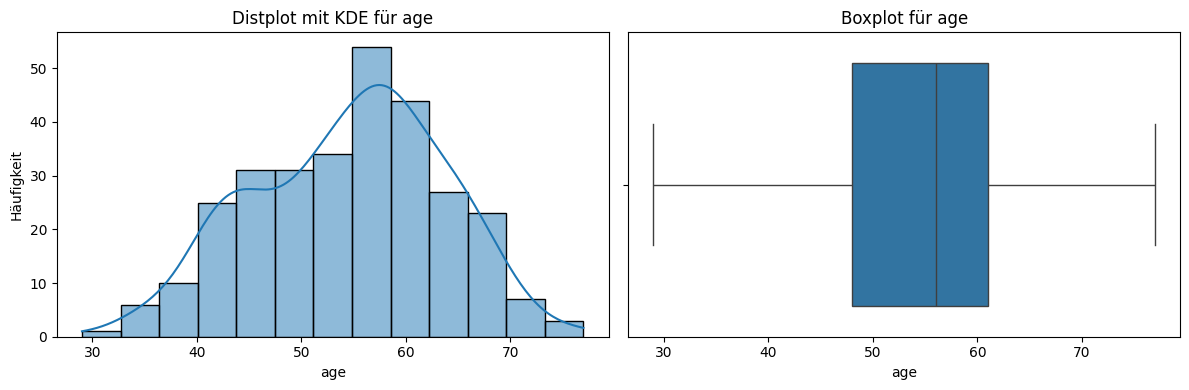

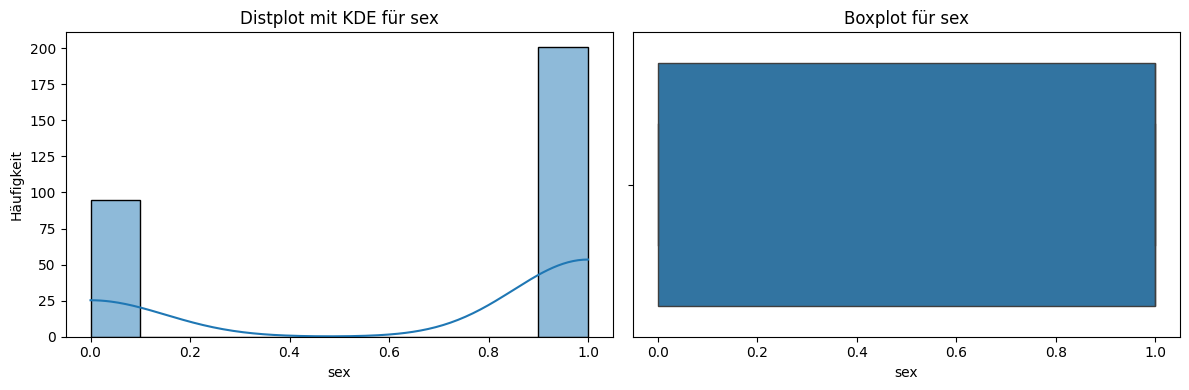

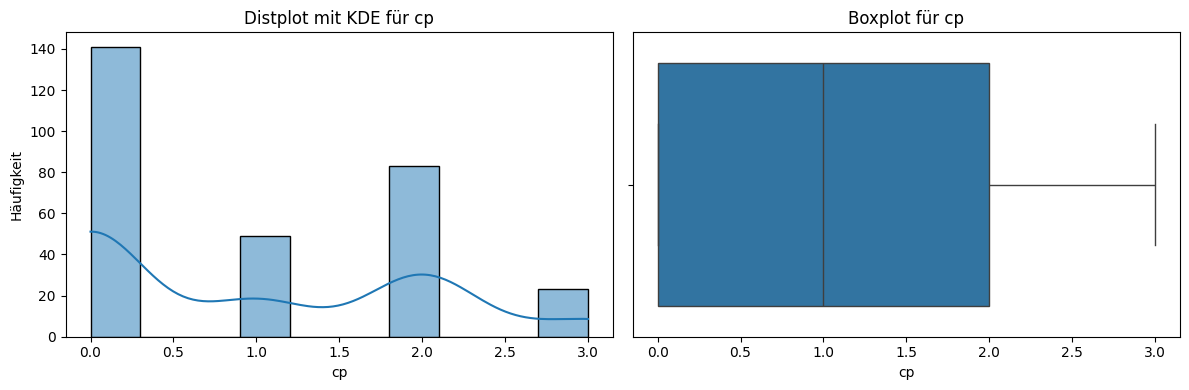

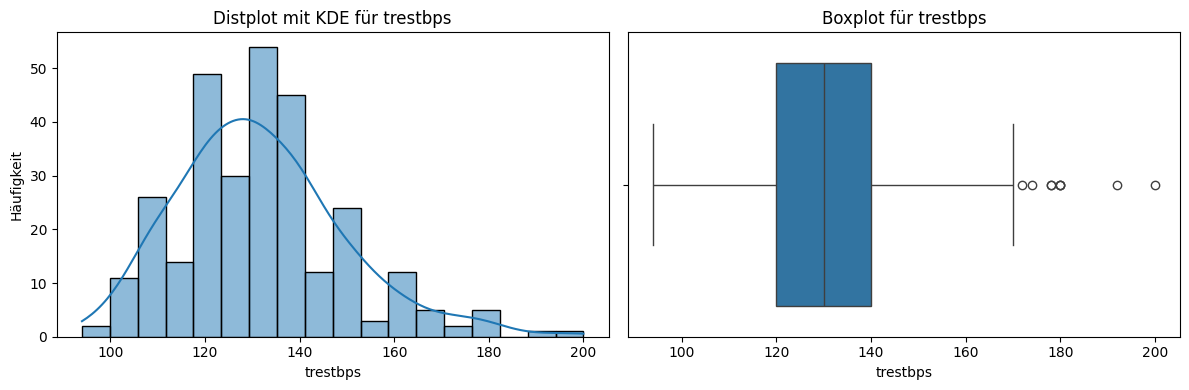

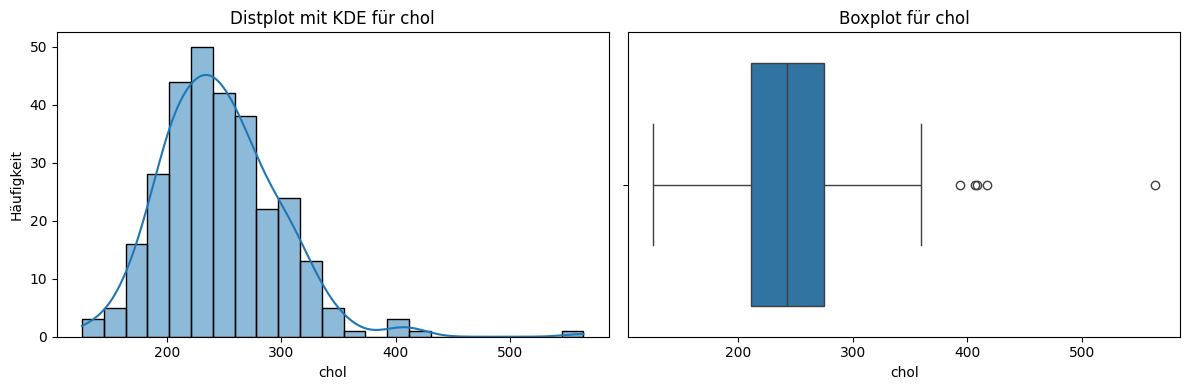

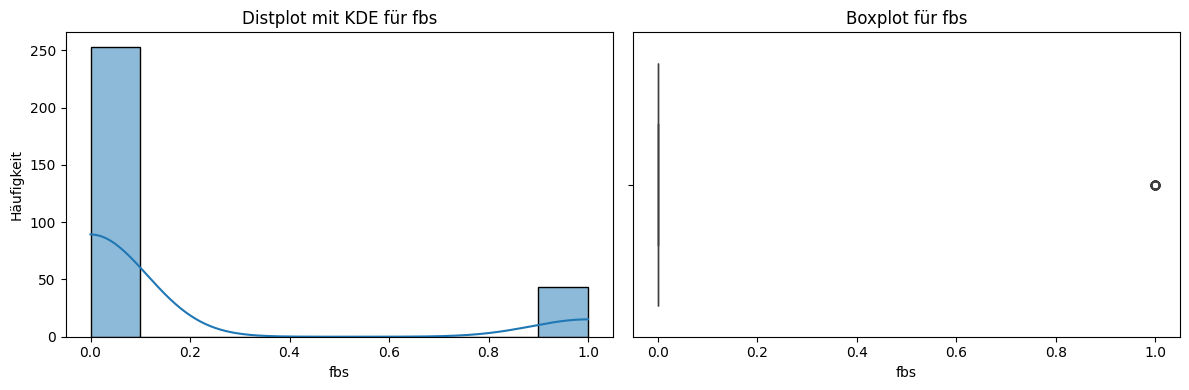

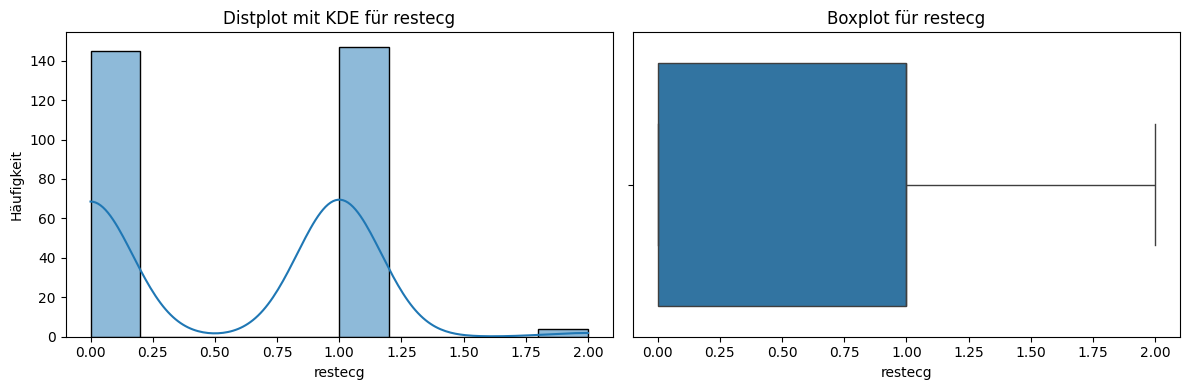

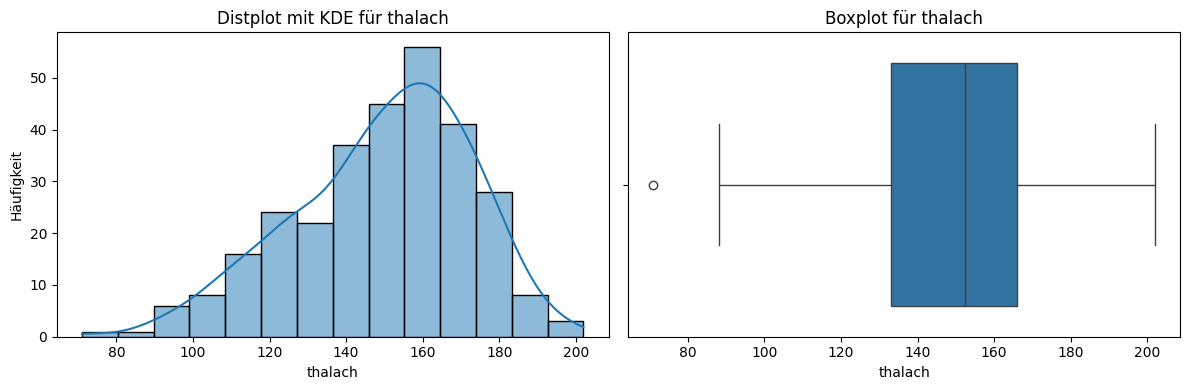

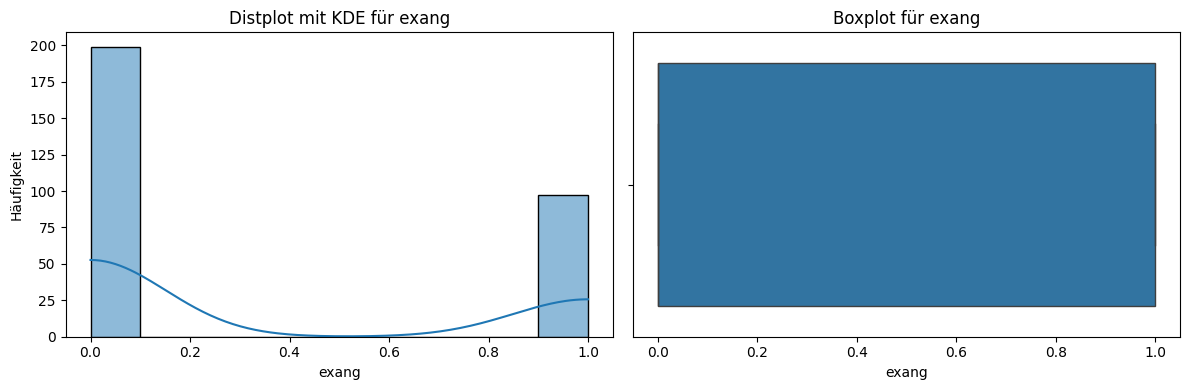

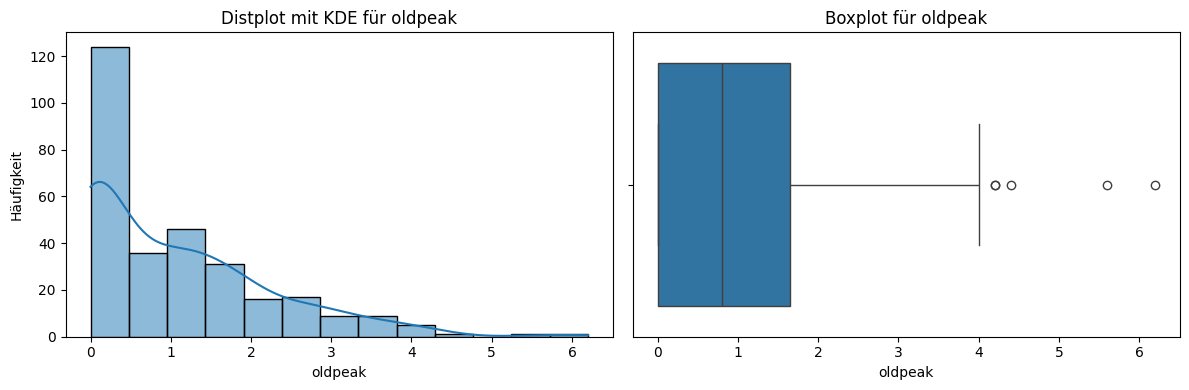

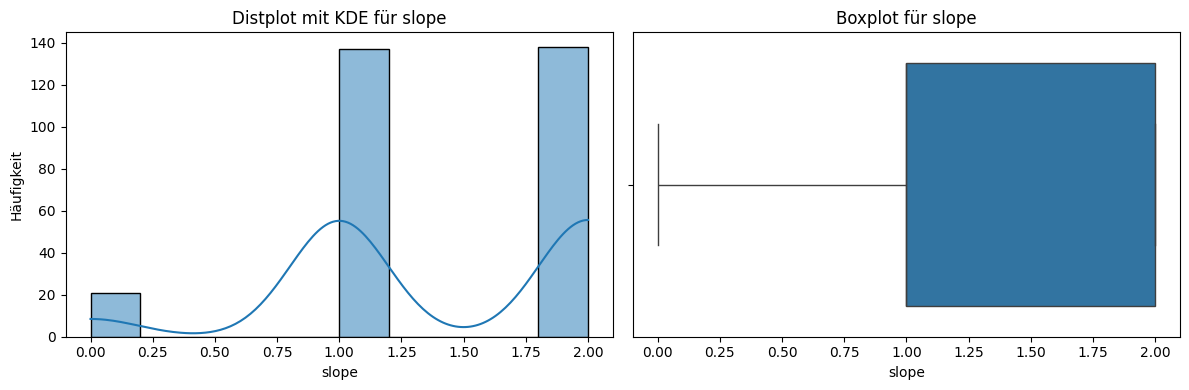

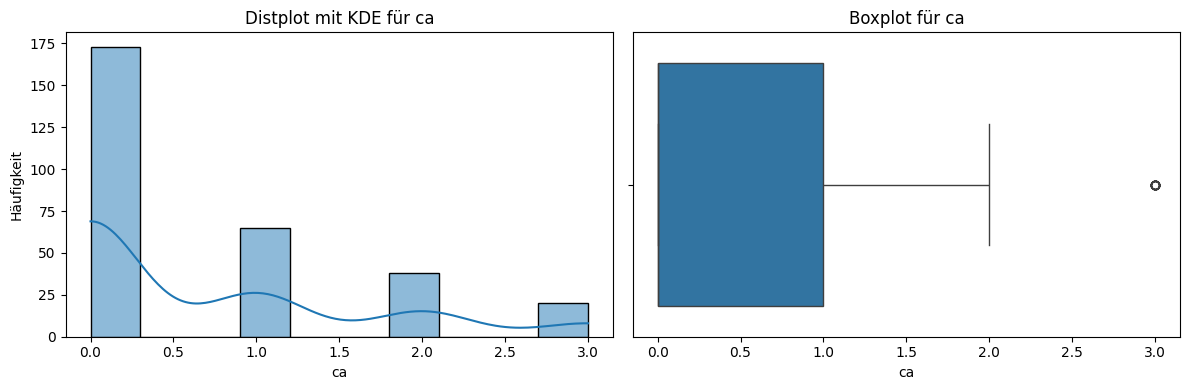

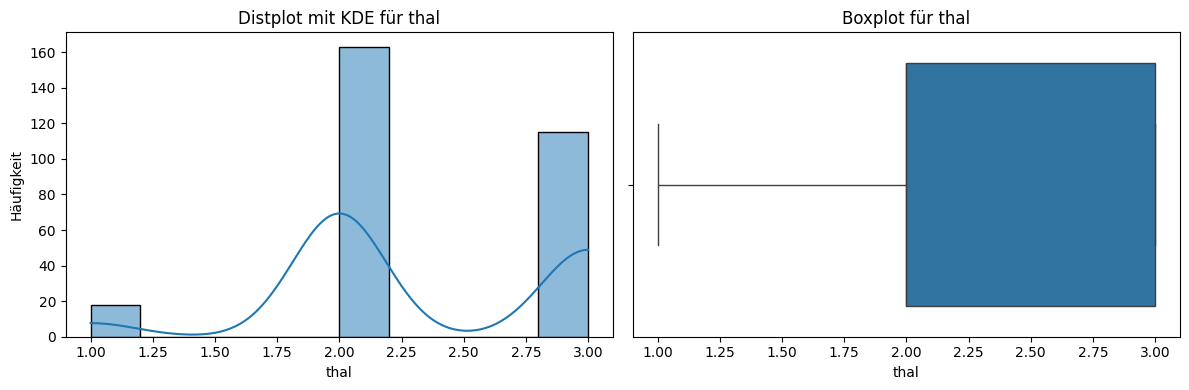

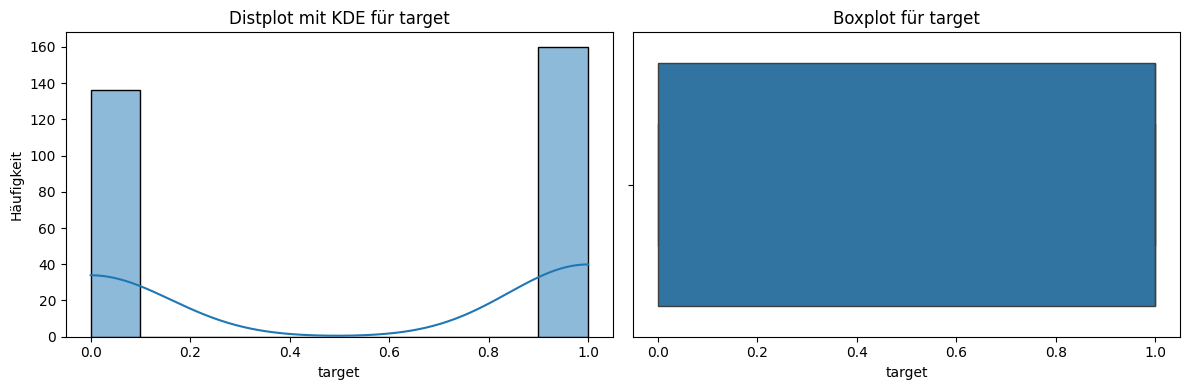

In [6]:
for feature in data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Zwei Subplots nebeneinander
    
    # Erstelle den Distplot (mit KDE) für das Feature
    sns.histplot(data[feature], kde=True, ax=axes[0])
    axes[0].set_title(f'Distplot mit KDE für {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Häufigkeit')
    
    # Erstelle den Boxplot für das Feature
    sns.boxplot(x=data[feature], ax=axes[1])
    axes[1].set_title(f'Boxplot für {feature}')
    axes[1].set_xlabel(feature)
    
    # Zeige die Plots an
    plt.tight_layout()
    plt.show()

/var/folders/6_/qvb5mg0n5hn96nwfd6_76jp00000gn/T/ipykernel_38754/2192461447.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="Blues")


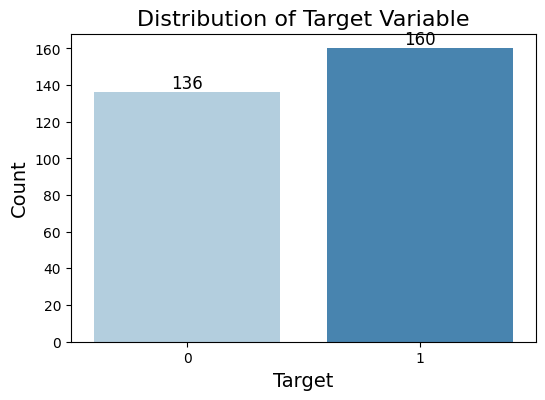

In [7]:
target_counts = data["target"].value_counts().sort_index()

# Erstelle ein Balkendiagramm zur Visualisierung der Verteilung
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Blues")

# Achsenbeschriftungen und Titel
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Target Variable", fontsize=16)

# Werte auf den Balken anzeigen
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 2, str(count), ha='center', fontsize=12)

plt.xticks([0, 1])  # Sicherstellen, dass die Achsenwerte korrekt gesetzt sind
plt.show()


#### 4.2 Korrelation und Zusammenhang zwischen Features

<details>
  <summary><b>Hinweis</b></summary>
  <p><code>.corr()</code>: Berechnet Korrelationsmatrix aller Features</p>
</details>

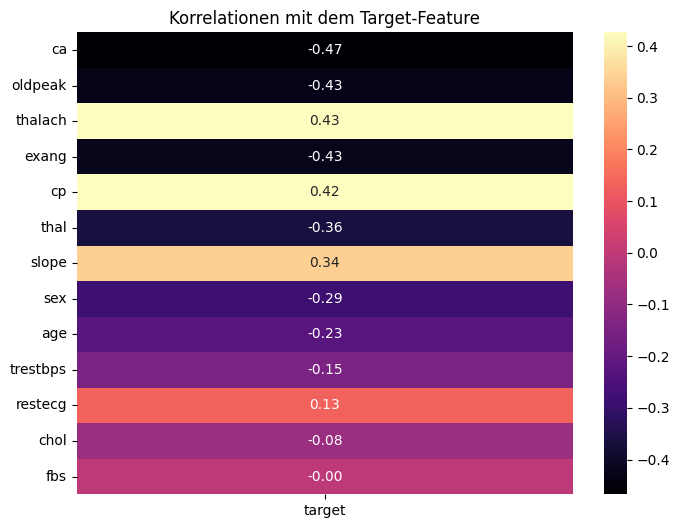

In [8]:
corr = data.corr()
target_corr = corr["target"].drop("target").sort_values(key=abs, ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='magma', fmt='.2f', cbar=True)
plt.title('Korrelationen mit dem Target-Feature')
plt.show()

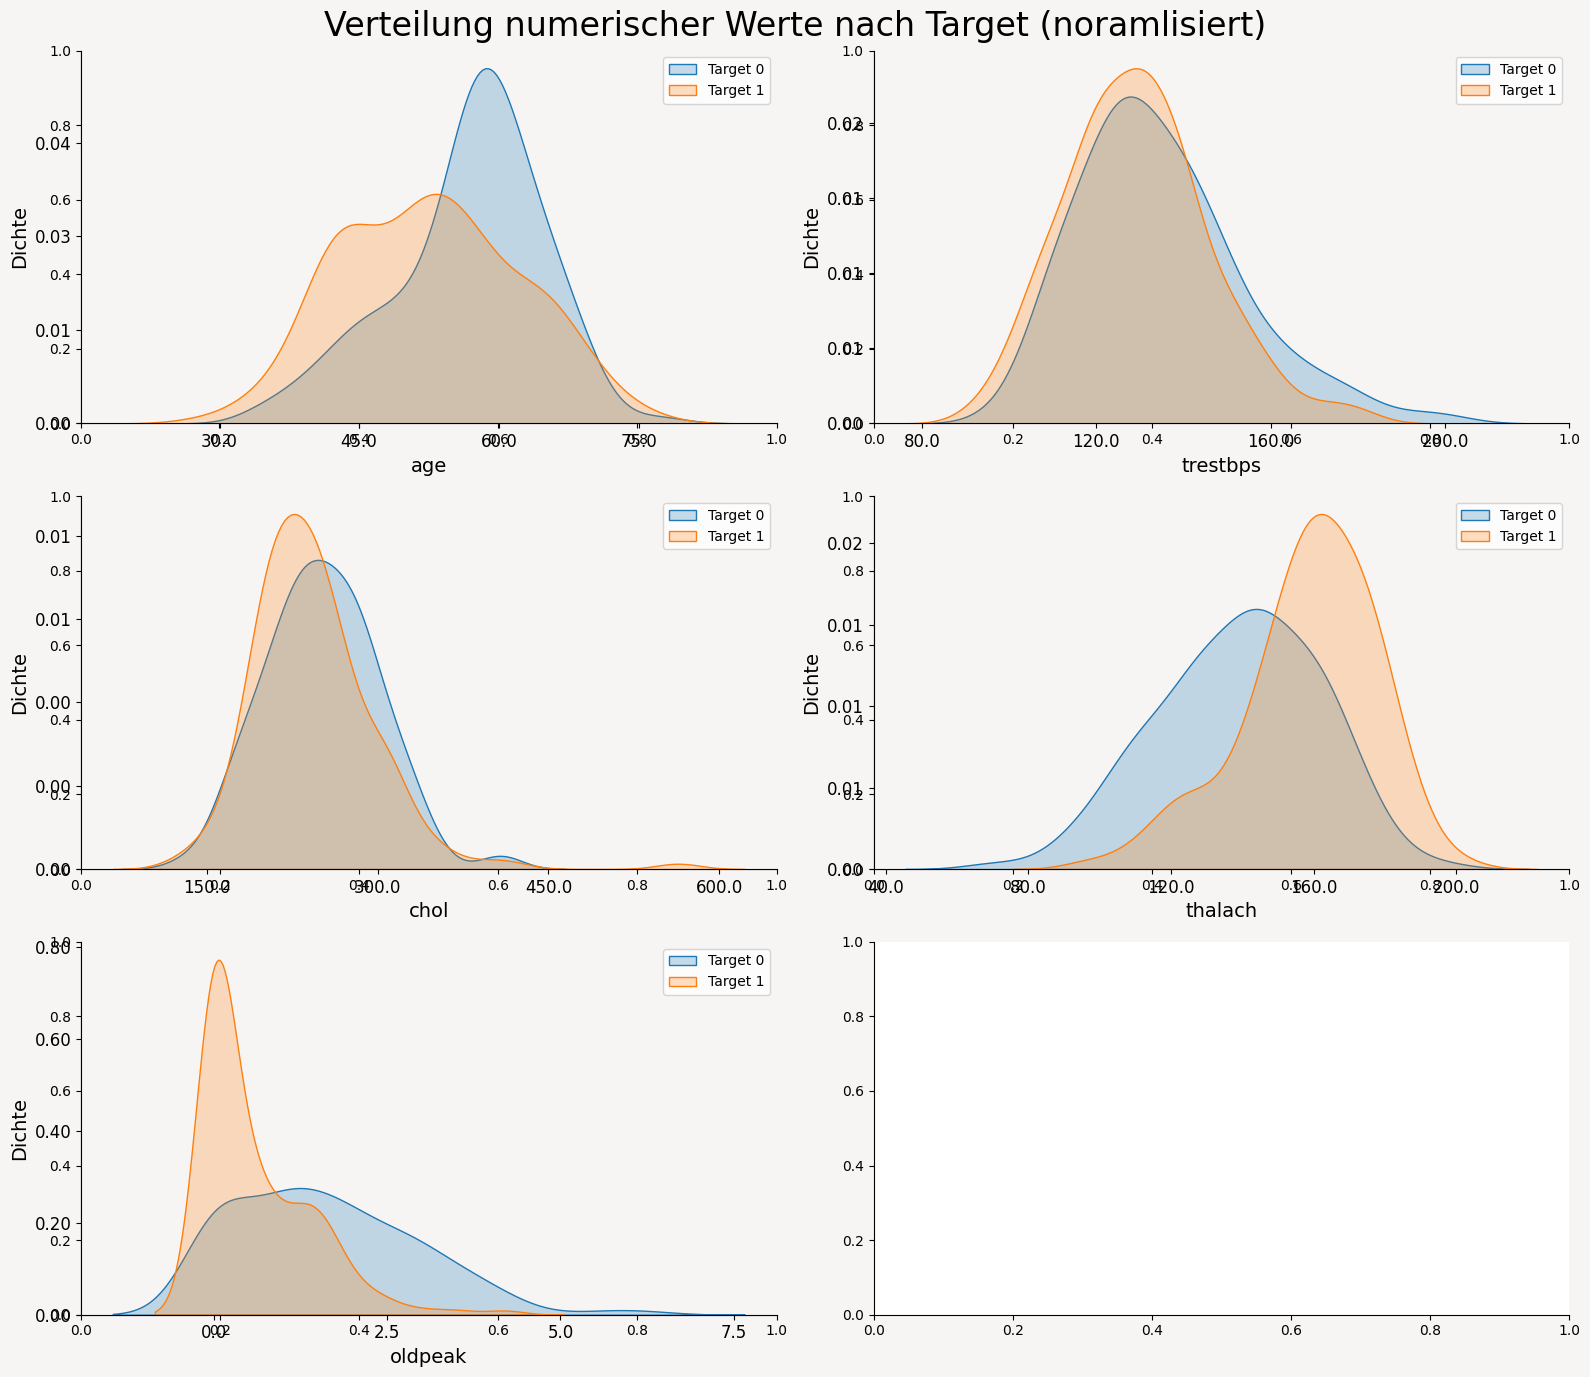

In [9]:
num_feats = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

# Berechne die Verteilung des Targets
target_counts = data["target"].value_counts(normalize=True)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    # Erstelle die KDEs für jede Klasse separat
    for target_value in sorted(data["target"].unique()):
        subset = data[data["target"] == target_value][col]
        
        # Normierte Dichte-Schätzung mit common_norm=True für gleiche Flächen
        sns.kdeplot(subset, label=f"Target {target_value}", fill=True, common_norm=True)
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Dichte", fontsize=14)
    plt.legend()
    sns.despine(right=True)

    # Formatierung der Achsenbeschriftungen
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # 5 gleichmäßige Schritte auf der x-Achse
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # 5 gleichmäßige Schritte auf der y-Achse

    # Verwende FormatStrFormatter, um die Beschriftungen zu formatieren
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))  # x-Achse: 1 Nachkommastelle
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))  # y-Achse: 2 Nachkommastellen

    # Verbessere die Lesbarkeit der Ticks
    plt.tick_params(axis='both', which='major', labelsize=12)

    i += 1

plt.suptitle('Verteilung numerischer Werte nach Target (noramlisiert)', fontsize=24)
plt.tight_layout()
plt.show()

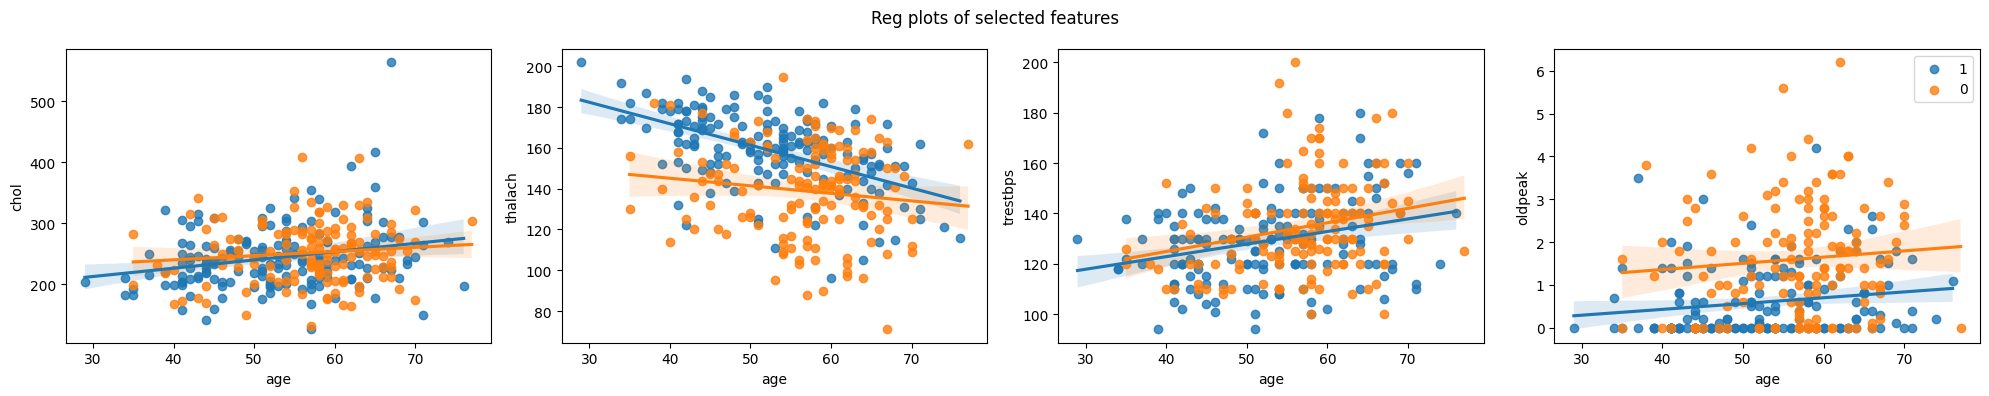

In [10]:
# Definiere eine Farbpallette (beispielsweise mypal)
mypal = ['#1f77b4', '#ff7f0e']  # Beispielpalette

# Erstelle 4 Subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

# Regplots für die verschiedenen Kombinationen von 'age' und anderen numerischen Features
sns.regplot(data=data[data['target'] == 1], x='age', y='chol', ax=ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='chol', ax=ax[0], color=mypal[1], label='0')

sns.regplot(data=data[data['target'] == 1], x='age', y='thalach', ax=ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='thalach', ax=ax[1], color=mypal[1], label='0')

sns.regplot(data=data[data['target'] == 1], x='age', y='trestbps', ax=ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='trestbps', ax=ax[2], color=mypal[1], label='0')

sns.regplot(data=data[data['target'] == 1], x='age', y='oldpeak', ax=ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] == 0], x='age', y='oldpeak', ax=ax[3], color=mypal[1], label='0')

# Titel und Legende
plt.suptitle('Reg plots of selected features')
plt.legend()

# Layout und Anzeige der Grafik
plt.tight_layout()
plt.show()


### 5. Training

In [11]:
torch.manual_seed(42)  # Für reproduzierbare Ergebnisse

def preprocessData(batch_size):
    """
    Lädt und bereitet den Herzkrankheits-Datensatz auf.
    """

    # Lade den Datensatz (mit einem Beispiel für Herzkrankheiten)
    dataset = pd.read_csv("heart.csv")


    # Aufteilen in Trainings- und Testdaten
    train_data = dataset.sample(frac=0.8, random_state=42)
    test_data = dataset.drop(train_data.index)

    train_data_labels = train_data.iloc[:, -1]
    train_data = train_data.iloc[:, :-1]

    test_data_labels = test_data.iloc[:, -1]
    test_data = test_data.iloc[:, :-1]

    # Umwandlung in PyTorch Tensor
    torch_train_data = torch.tensor(train_data.values, dtype=torch.float32)
    torch_train_data_labels = torch.tensor(train_data_labels.values, dtype=torch.float32).reshape(-1, 1)

    torch_test_data = torch.tensor(test_data.values, dtype=torch.float32)
    torch_test_data_labels = torch.tensor(test_data_labels.values, dtype=torch.float32).reshape(-1, 1)

    # DataLoader für Training und Test
    train_data_loader = DataLoader(dataset=TensorDataset(torch_train_data, torch_train_data_labels), batch_size=batch_size, shuffle=True)
    test_data_loader = DataLoader(dataset=TensorDataset(torch_test_data, torch_test_data_labels), batch_size=batch_size, shuffle=False)

    return train_data_loader, test_data_loader


class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers):
        """
        Initialisiert ein einfaches Feedforward-Neuronales Netzwerk.
        """
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        self.hidden_layer = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.output_layer = nn.Linear(hidden_layers[1], output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Der Vorwärtsdurchlauf des neuronalen Netzwerks.
        """
        x = torch.relu(self.input_layer(x))
        x = torch.relu(self.hidden_layer(x))
        x = self.sigmoid(self.output_layer(x))
        return x


def trainModel(model, train_data_loader, epochs, criterion, optimizer):
    """
    Trainiert das Modell.
    """
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {running_loss/len(train_data_loader)}")


def getAccuracy(model, test_data_loader):
    """
    Berechnet die Genauigkeit des Modells auf dem Testdatensatz.
    """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_data_loader:
            outputs = model(inputs)
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy


# Parameter
batch_size = 32
input_size = 13  # Anzahl der Eingabefeatures
output_size = 1  # Nur eine Ausgabe (Krankheit: Ja/Nein)
hidden_layers = [32, 16]  # Zwei verborgene Schichten
epochs = 2500
learning_rate = 0.001

# Daten vorbereiten
train_data_loader, test_data_loader = preprocessData(batch_size)

# Modell, Verlustfunktion und Optimierer definieren
model = SimpleNN(input_size, output_size, hidden_layers)
criterion = nn.BCELoss()  # Binary Cross Entropy für binäre Klassifikation
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Modell trainieren
trainModel(model, train_data_loader, epochs, criterion, optimizer)

# Genauigkeit auf Trainings- und Testdatensatz berechnen
train_accuracy = getAccuracy(model, train_data_loader)
test_accuracy = getAccuracy(model, test_data_loader)

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 0/2500, Loss: 3.700164258480072
Epoch 100/2500, Loss: 0.4216640703380108
Epoch 200/2500, Loss: 0.3681335337460041
Epoch 300/2500, Loss: 0.3476707898080349
Epoch 400/2500, Loss: 0.3508930690586567
Epoch 500/2500, Loss: 0.361118845641613
Epoch 600/2500, Loss: 0.31165168806910515
Epoch 700/2500, Loss: 0.3127121143043041
Epoch 800/2500, Loss: 0.3085138127207756
Epoch 900/2500, Loss: 0.30554731376469135
Epoch 1000/2500, Loss: 0.2755042053759098
Epoch 1100/2500, Loss: 0.24505113530904055
Epoch 1200/2500, Loss: 0.21651390008628368
Epoch 1300/2500, Loss: 0.19177593290805817
Epoch 1400/2500, Loss: 0.21071437560021877
Epoch 1500/2500, Loss: 0.17371901823207736
Epoch 1600/2500, Loss: 0.16645724512636662
Epoch 1700/2500, Loss: 0.21228379383683205
Epoch 1800/2500, Loss: 0.12186781736090779
Epoch 1900/2500, Loss: 0.1803127946332097
Epoch 2000/2500, Loss: 0.18929518293589354
Epoch 2100/2500, Loss: 0.09210048150271177
Epoch 2200/2500, Loss: 0.0809150009881705
Epoch 2300/2500, Loss: 0.07934476260